/home/codespace/.local/lib/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


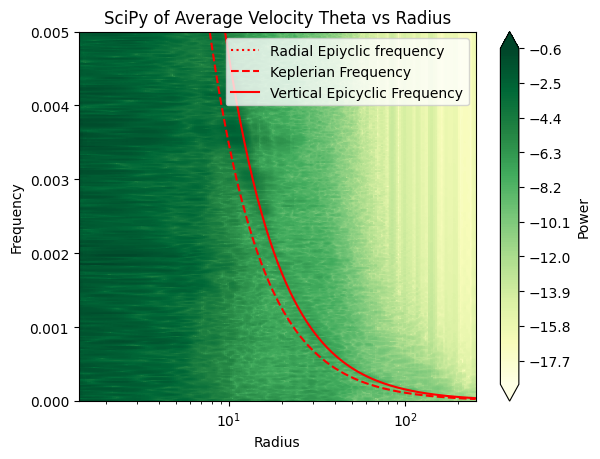

/home/codespace/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.fft import fft, fftfreq, rfftfreq, rfft
import pandas as pd

df = pd.read_csv('/workspaces/Variability-in-Black-Holes/data/AvgVtheta', sep = '\t', header=None, names = ['time', 'radius', 'mdot'])
fft_data = []
fftls_data = []

radiidf = df.radius.unique()

freq = rfftfreq(572, 100)

for radius in df.radius.unique():
  df_new = df.loc[df['radius'] == radius]
  variable_array = np.array(df_new['mdot'])
  power = rfft(variable_array)
  fft_data.append(power)
  frequency, power2 = LombScargle(df_new['time'], variable_array).autopower()
  fftls_data.append(power2)

fft_df = pd.DataFrame(fft_data)
fft_df = fft_df.transpose()
fftls_df = pd.DataFrame(fftls_data)
fftls_df = fftls_df.transpose()

a = .9
keplerian_value = 1/(radiidf**1.5 + a)
keplerian_freq = (keplerian_value/ (2** np.pi))
rad_epicyclic_freq = np.sqrt((1- (6/radiidf) + (8*a /(radiidf**1.5)) - (3 * a ** 2) / (radiidf ** 2) * keplerian_value ** 2)) / (2* np.pi)
verticl_freq = np.sqrt(keplerian_value ** 2 * (1- (4*a / (radiidf**1.5)) + 3* a * a / (radiidf **2))) / (2* np.pi)

plt.figure()
plt.title('SciPy of Average Velocity Theta vs Radius')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.plot(radiidf, rad_epicyclic_freq, label = 'Radial Epiyclic frequency', linestyle = ':', c = 'red')
plt.plot(radiidf, keplerian_freq, label = 'Keplerian Frequency', linestyle = '--', c = 'red')
plt.plot(radiidf, verticl_freq, label = 'Vertical Epicyclic Frequency', linestyle = '-', c = 'red')
plt.legend()
plt.ylim(0, 0.005)
plt.contourf(radiidf, freq, np.log(fft_df), cmap='YlGn', extend = 'both', levels = 200)
plt.xscale('log')
plt.colorbar(label = 'Power')
plt.show()

plt.figure()
plt.title('LombScargle of Average Velocity Theta vs Radius')
plt.contourf(radiidf, frequency, np.log(fftls_df), cmap='YlGn', extend = 'both', levels = np.linspace(-12, -1.5, 200))
plt.ylim(0, 0.005)
plt.plot(radiidf, rad_epicyclic_freq, label = 'Radial Epiyclic frequency', linestyle = ':', c = 'red')
plt.plot(radiidf, keplerian_freq, label = 'Keplerian Frequency', linestyle = '--', c = 'red')
plt.plot(radiidf, verticl_freq, label = 'Vertical Epicyclic Frequency', linestyle = '-', c = 'red')
plt.legend()
plt.xscale('log')
plt.colorbar(label = 'Power')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()